In [2]:
# Learning Scipy
import scipy as sp, numpy as np
data = np.genfromtxt("web_traffic.tsv", delimiter="\t")
data

array([[1.00000000e+00, 2.27333106e+03],
       [2.00000000e+00, 1.65725549e+03],
       [3.00000000e+00,            nan],
       ...,
       [7.41000000e+02, 5.39354199e+03],
       [7.42000000e+02, 5.90681494e+03],
       [7.43000000e+02, 4.88302246e+03]])

In [3]:
print(data.shape)

(743, 2)


In [4]:
x = data[:,0]
y = data[:,1]
### check for nulls
np.sum(np.isnan(y))

8

In [5]:
#### clean the data
x=x[~np.isnan(y)]
y=y[~np.isnan(y)]


In [41]:
import matplotlib.pyplot as plt
def plot_web_traffic(x,y,models=None, mx = None, ymax = None, fig_inde = None):
    '''Plot the web traffic (y) over time(x).'''
    plt.figure(figsize=(12,6), dpi=300) #width and height of the plot in inches
    plt.scatter(x,y, s= 10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/Hour")
    plt.xticks([w*7*24 for w in range(5)],
               ['week %i' %(w+1) for w in range(5)])
    if models:
        colors =['g','k','b','m','r']
        linestyles=['-','-.','--',':','-']
        if mx is None:
            mx = np.linspace(0, x[-1],1000)
            
        for model,style,color in zip(models,linestyles,colors):
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    plt.autoscale()
    if ymax:
        plt.ylim(ymax=ymax)

    plt.grid()
    plt.ylim(ymin=0)

def error(f,x,y):
    ''' Error of a function'''
    return np.sum((f(x)-y)**2)
mx = np.linspace(0, x[-1],1000)


C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':


Error of f1:  319531507.02083176
Error of the polynomial of degree 2 181347660.75761026
Error for the complete data set:
td=1: 319531507.020832
td=2: 181347660.757610
td=3: 140576460.879682
td=10: 123426935.751840
td=53: 110768250.267108


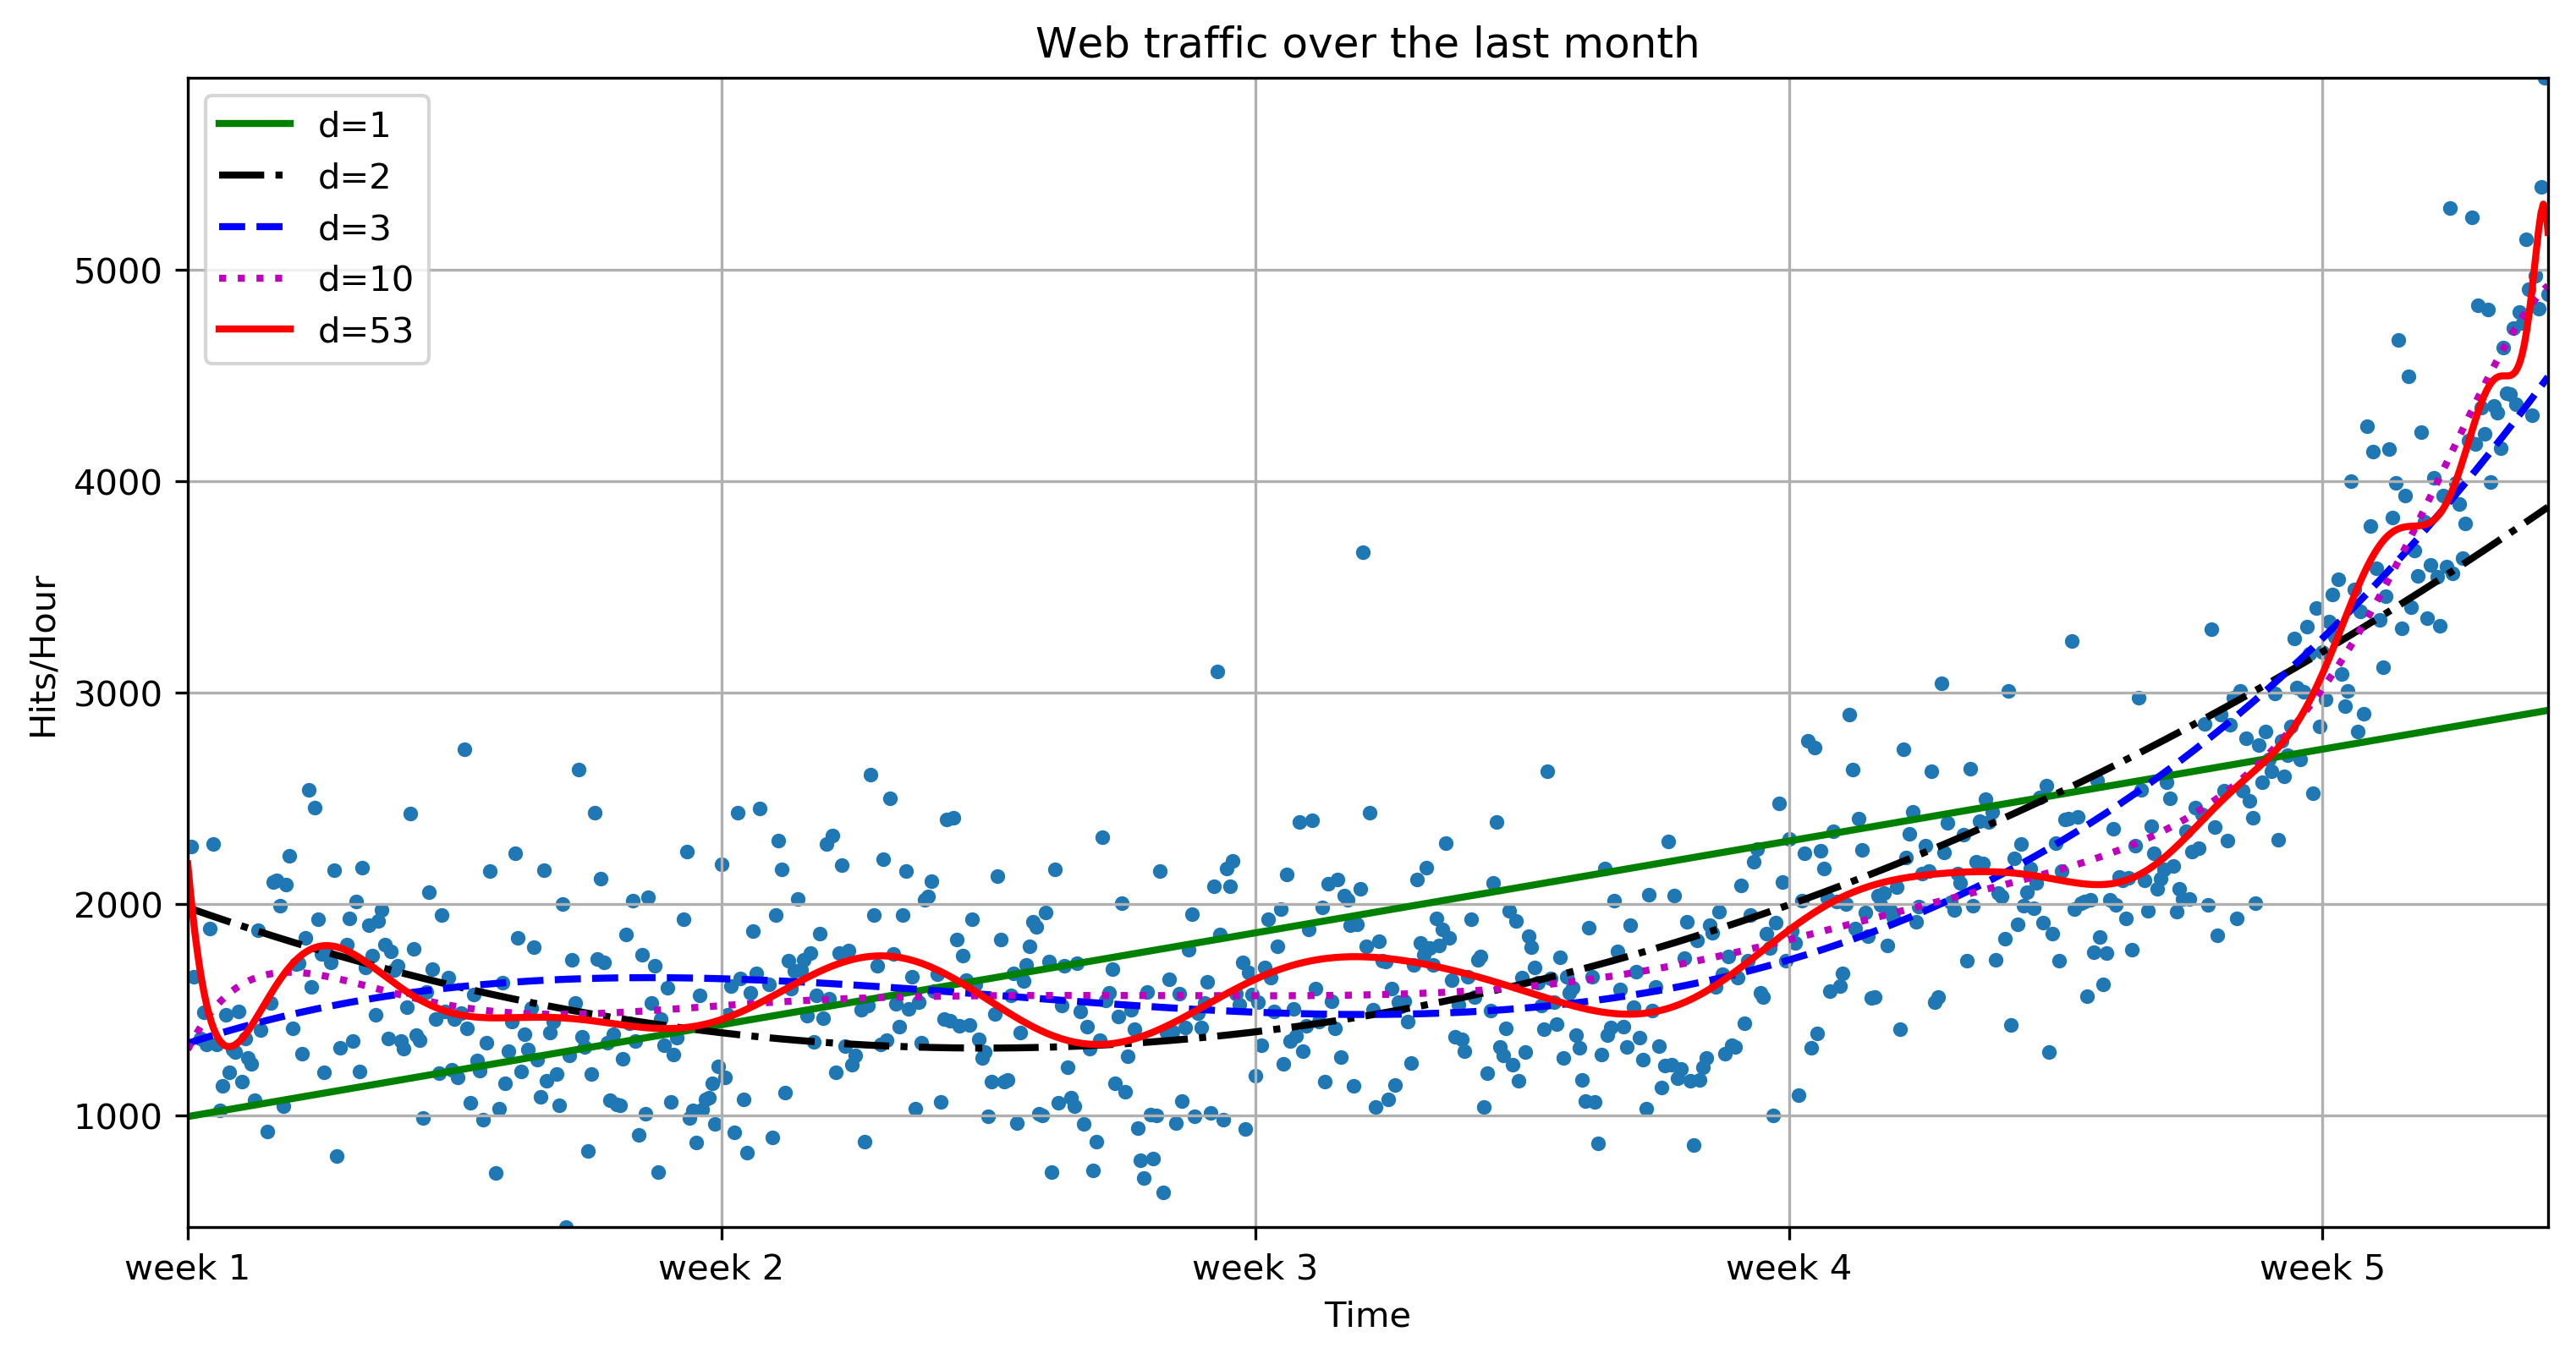

In [17]:
##fit a simple linear regression model to the data
# firsta simple straght line
fp1 = np.polyfit(x,y,1)
# a polynomoial with 2 degrees
fp2 = np.polyfit(x,y,2)
#polynomial with x degrees
fp3 =  np.polyfit(x,y,3)
fp10 =  np.polyfit(x,y,10)
fp100= np.polyfit(x,y,100)

f1 = np.poly1d(fp1)
f2 = np.poly1d(fp2)
f3 = np.poly1d(fp3)
f10= np.poly1d(fp10)
f100 = np.poly1d(fp100)
print("Error of f1: " ,error(f1,x,y))
print("Error of the polynomial of degree 2",error(f2,x,y))
plot_web_traffic(x,y,[f1,f2,f3,f10,f100])

print("Error for the complete data set:")
for f in [f1,f2,f3,f10,f100]:
    print("td=%i: %f" %(f.order, error(f, x, y)))


Error inflection=134390576.312955


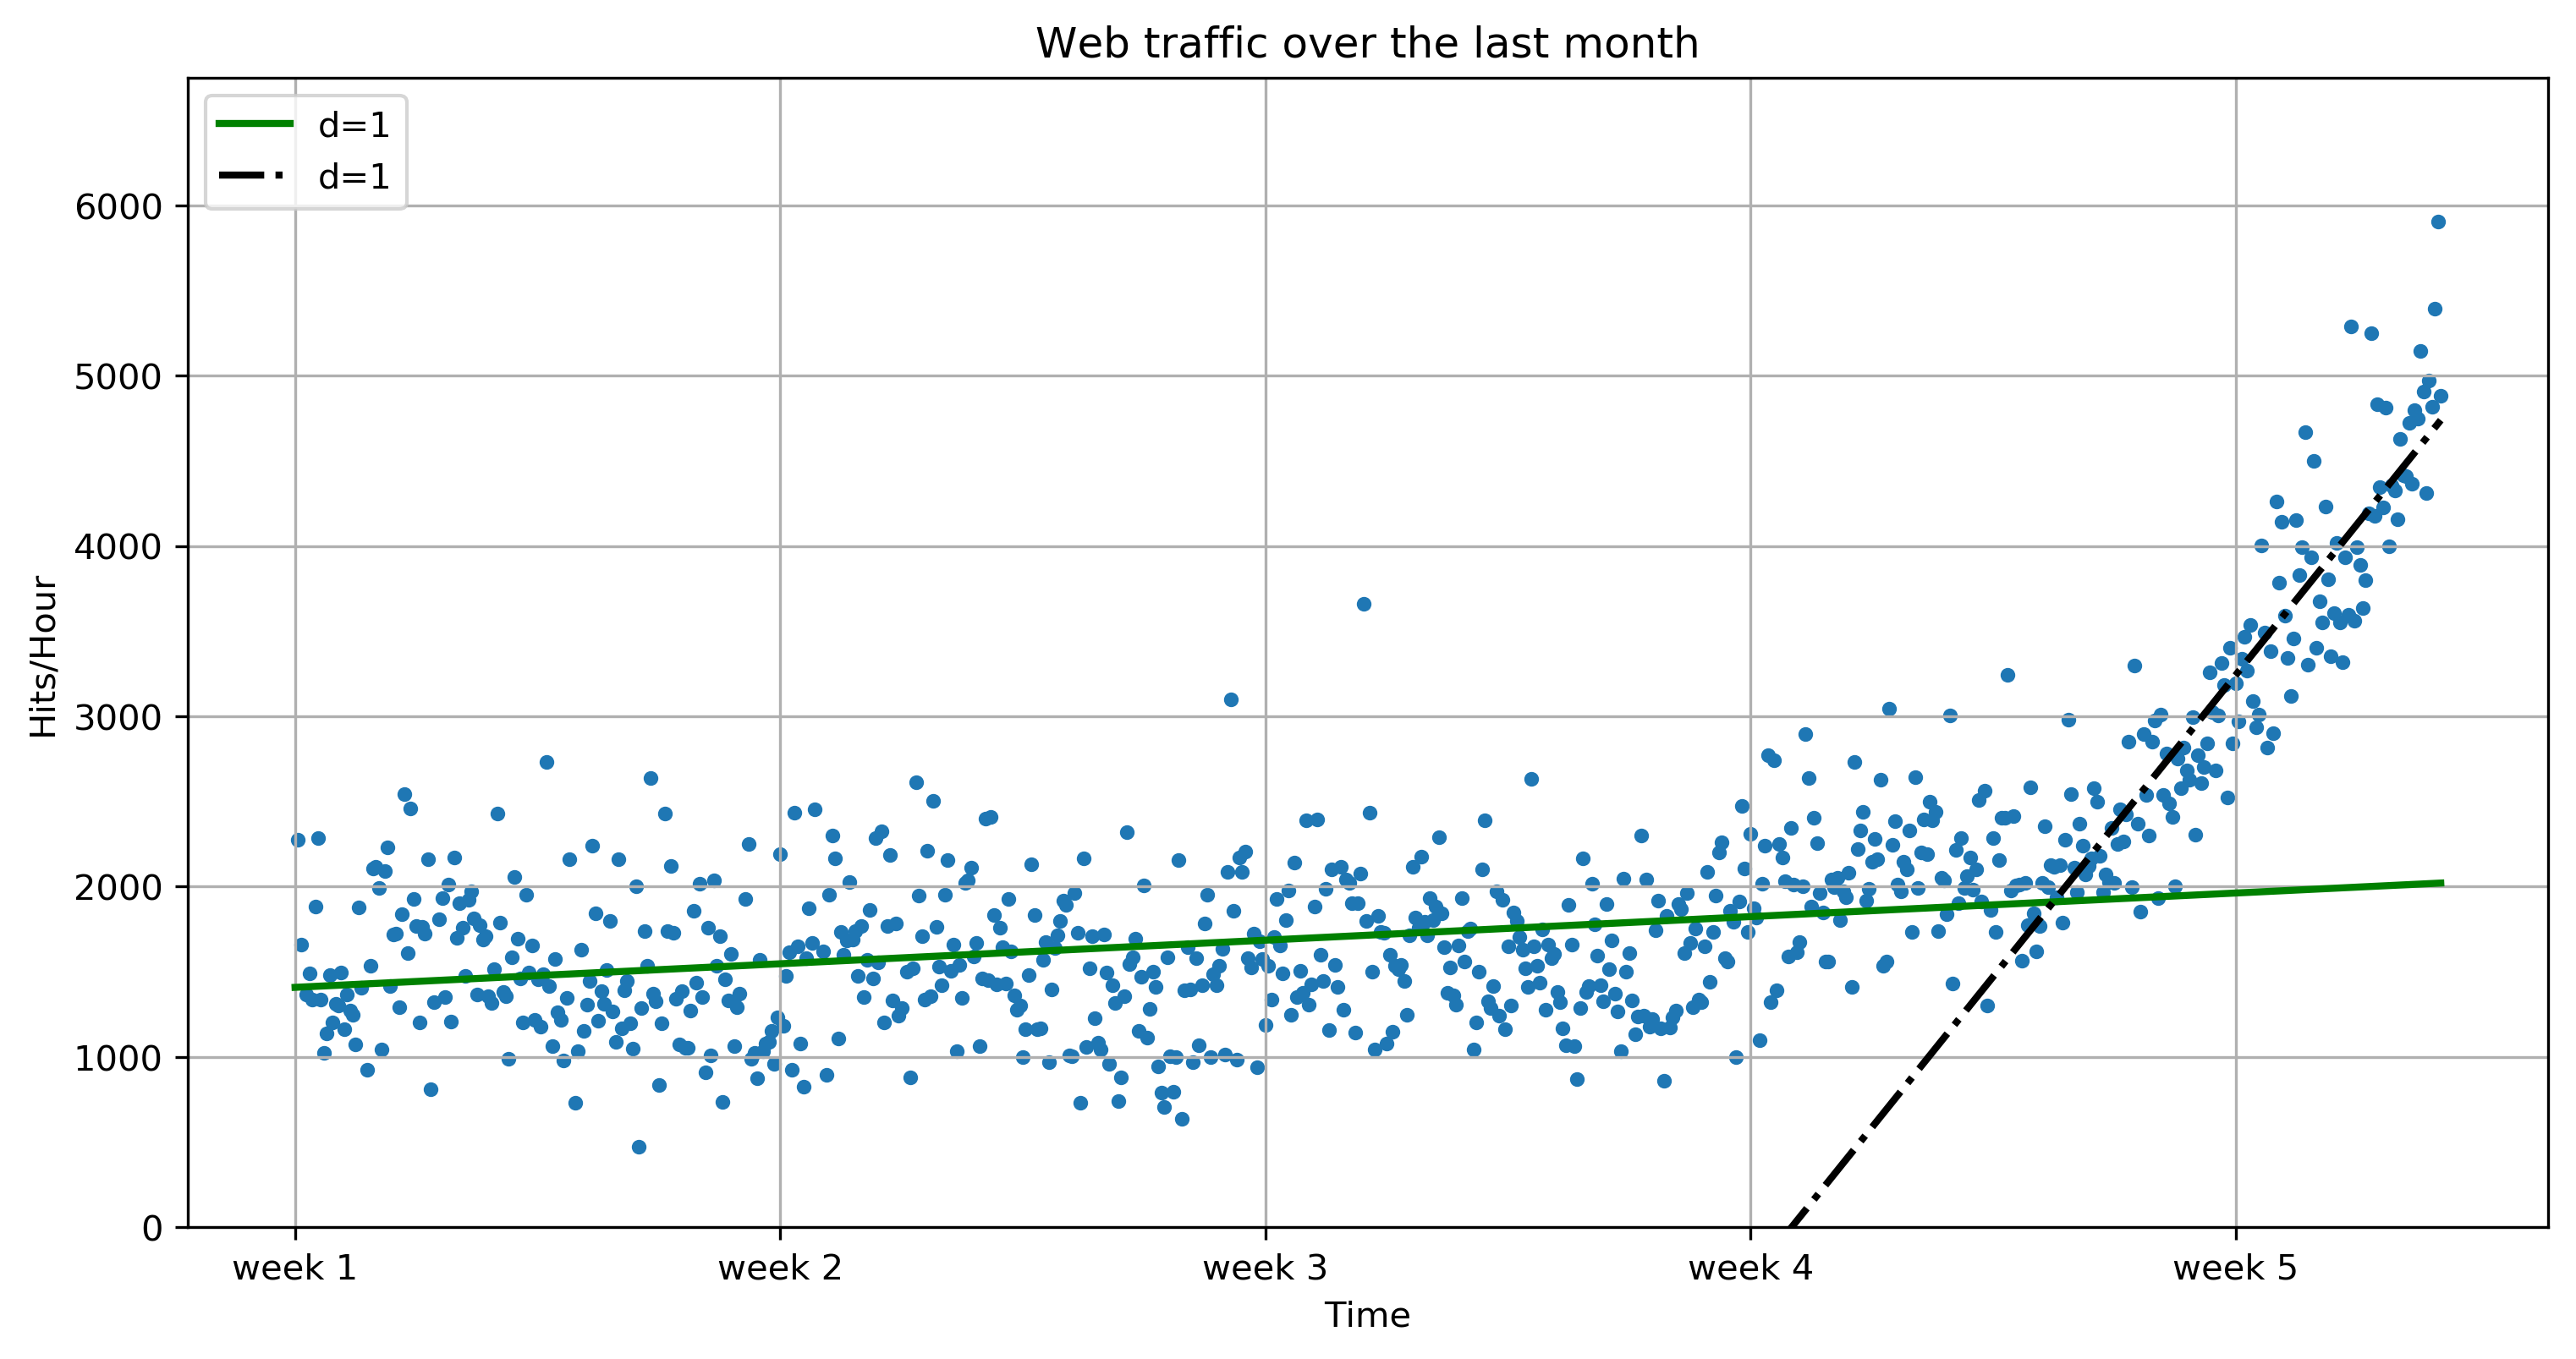

In [33]:
# seperate the data into two groups one before 3.5 weeks and another after
inflection = int(3.5*7*24) # find the number of hours until the infleciton point
xa = x[:inflection] # data before the inflection
ya = y[:inflection]
xb = x[inflection:] # data after the inflection
yb = y[inflection:]

fa = np.poly1d(np.polyfit(xa,ya,1))
fb = np.poly1d(np.polyfit(xb,yb,1))

fa_error = error(fa,xa,ya)
fb_error = error(fb,xb,yb)
print("Error inflection=%f" % (fa_error + fb_error))
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))
plot_web_traffic(x,y,[fa,fb])









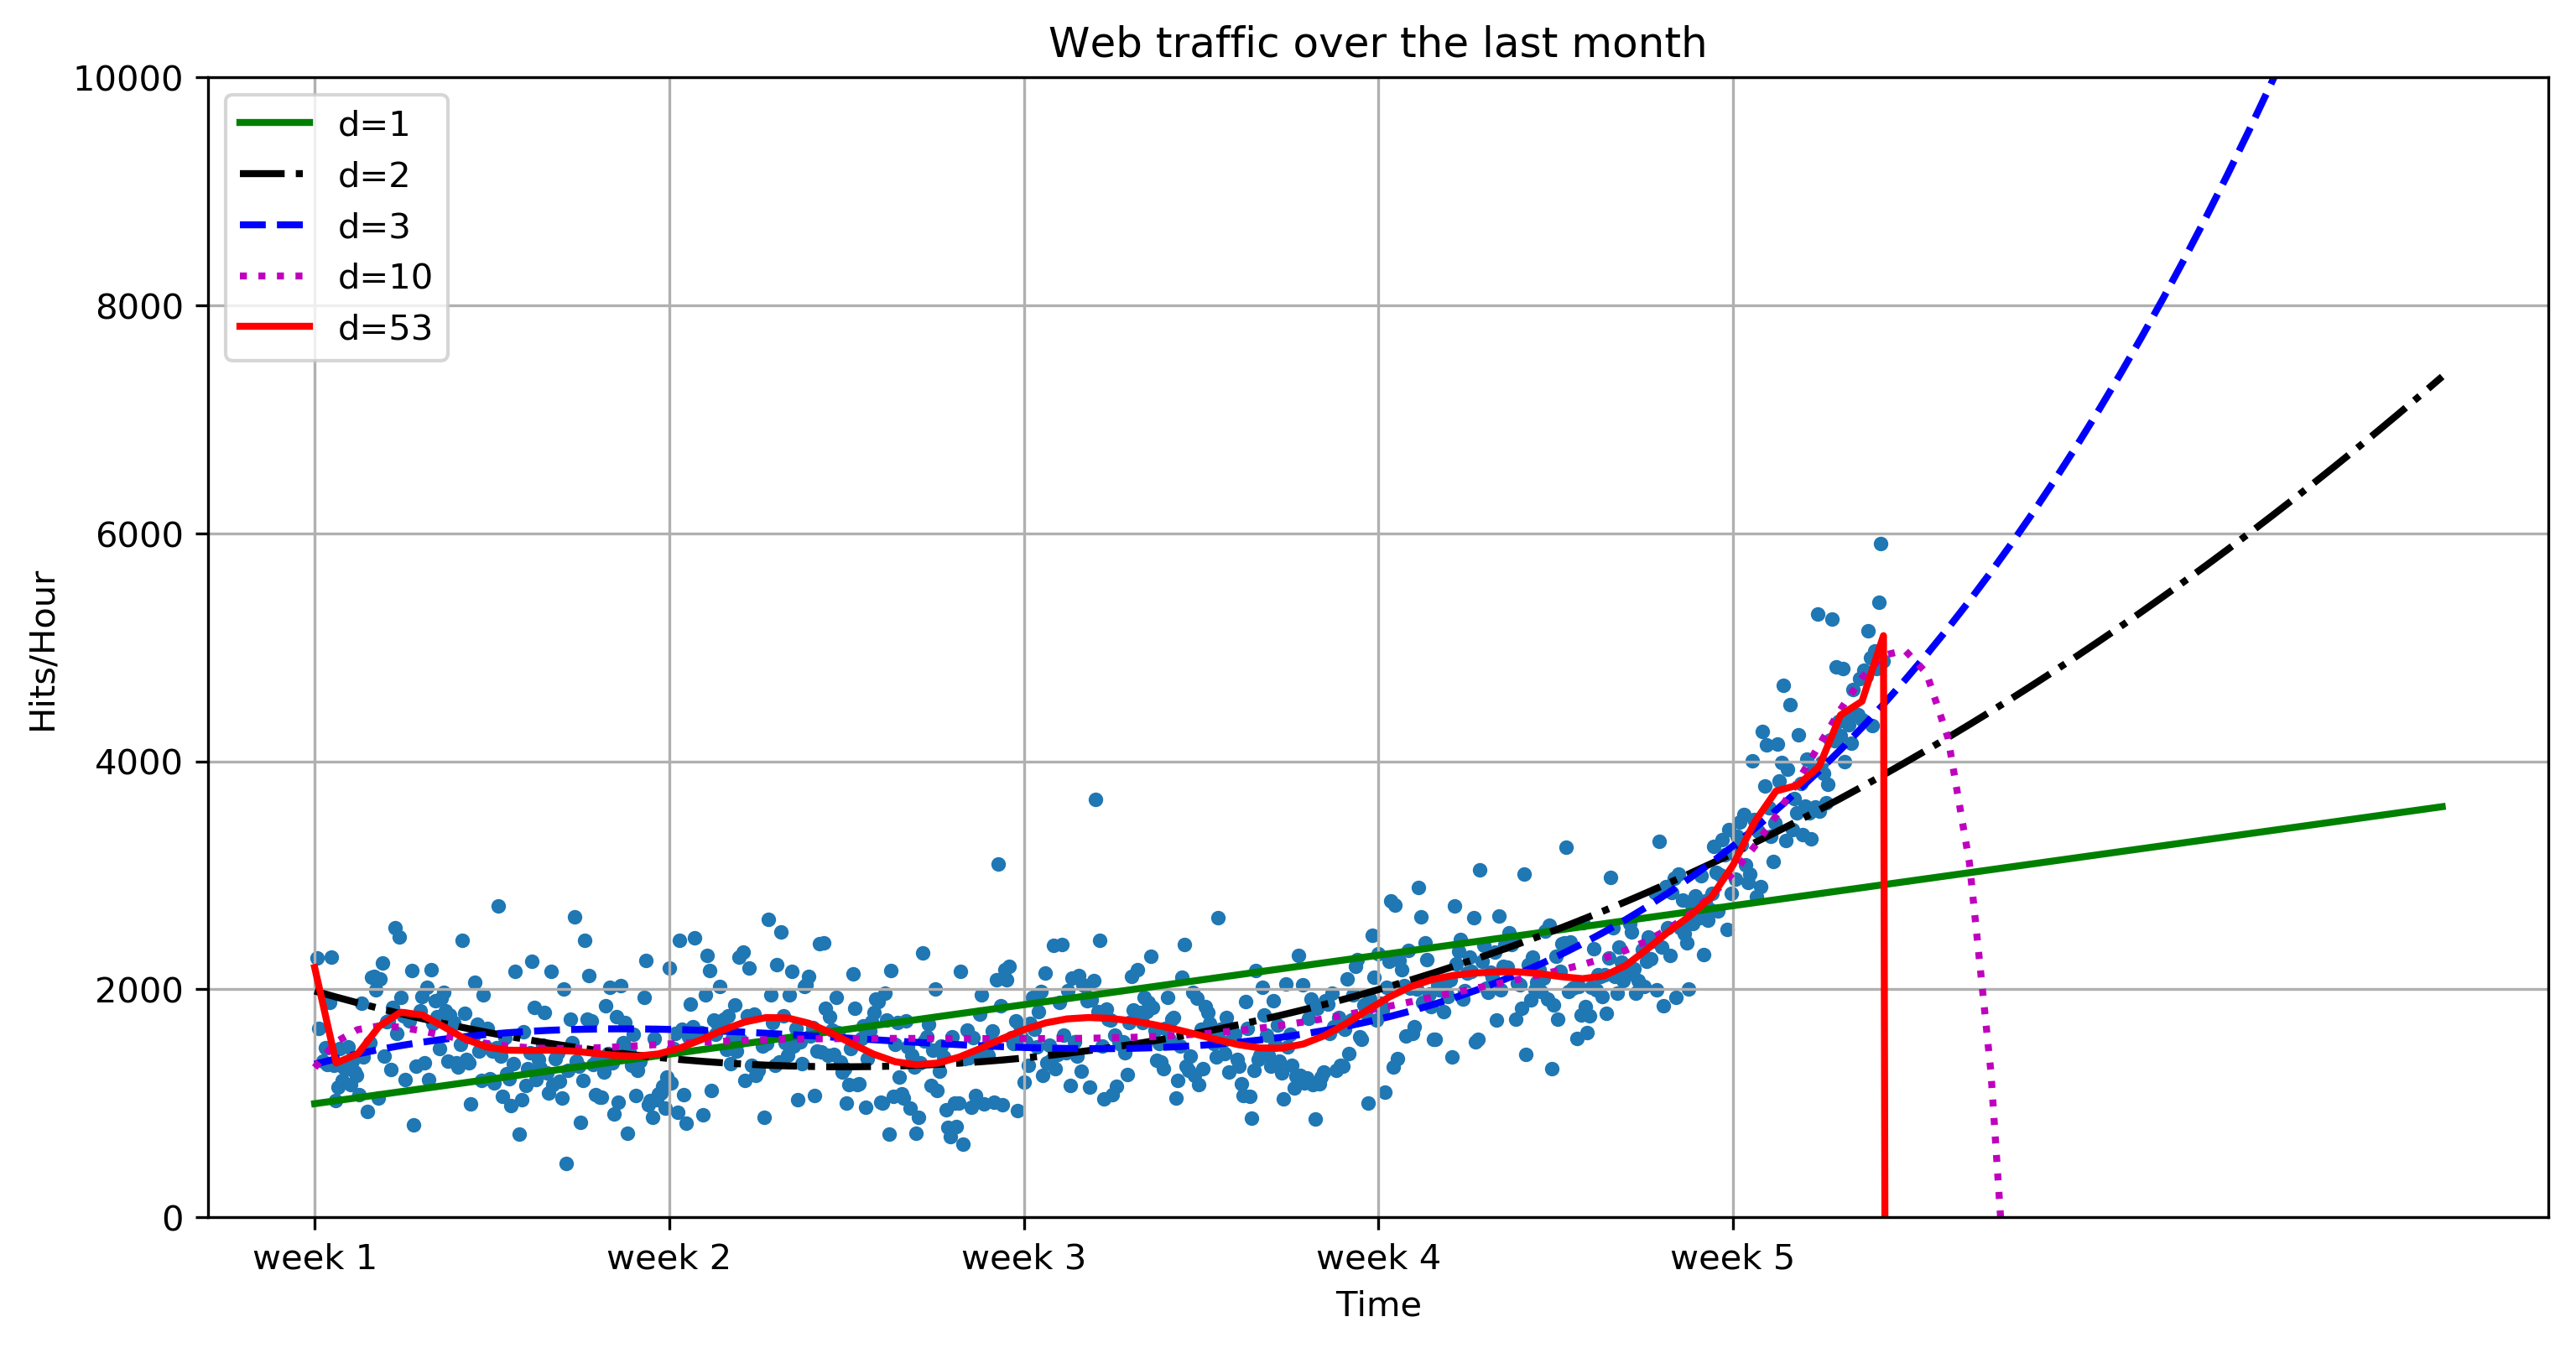

In [44]:
## an example of overfitting f10 and f100 don't predict well into the future what we would expect
plot_web_traffic(x, y, [f1, f2, f3, f10, f100],
    mx=np.linspace(0, 6 * 7 * 24, 100),
    ymax=10000)

C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


Errors for only the time after inflection point
td=1: 22140590.599277
td=2: 19764355.660566
td=3: 19762196.404684
td=10: 18942545.414831
td=53: 18293734.862856


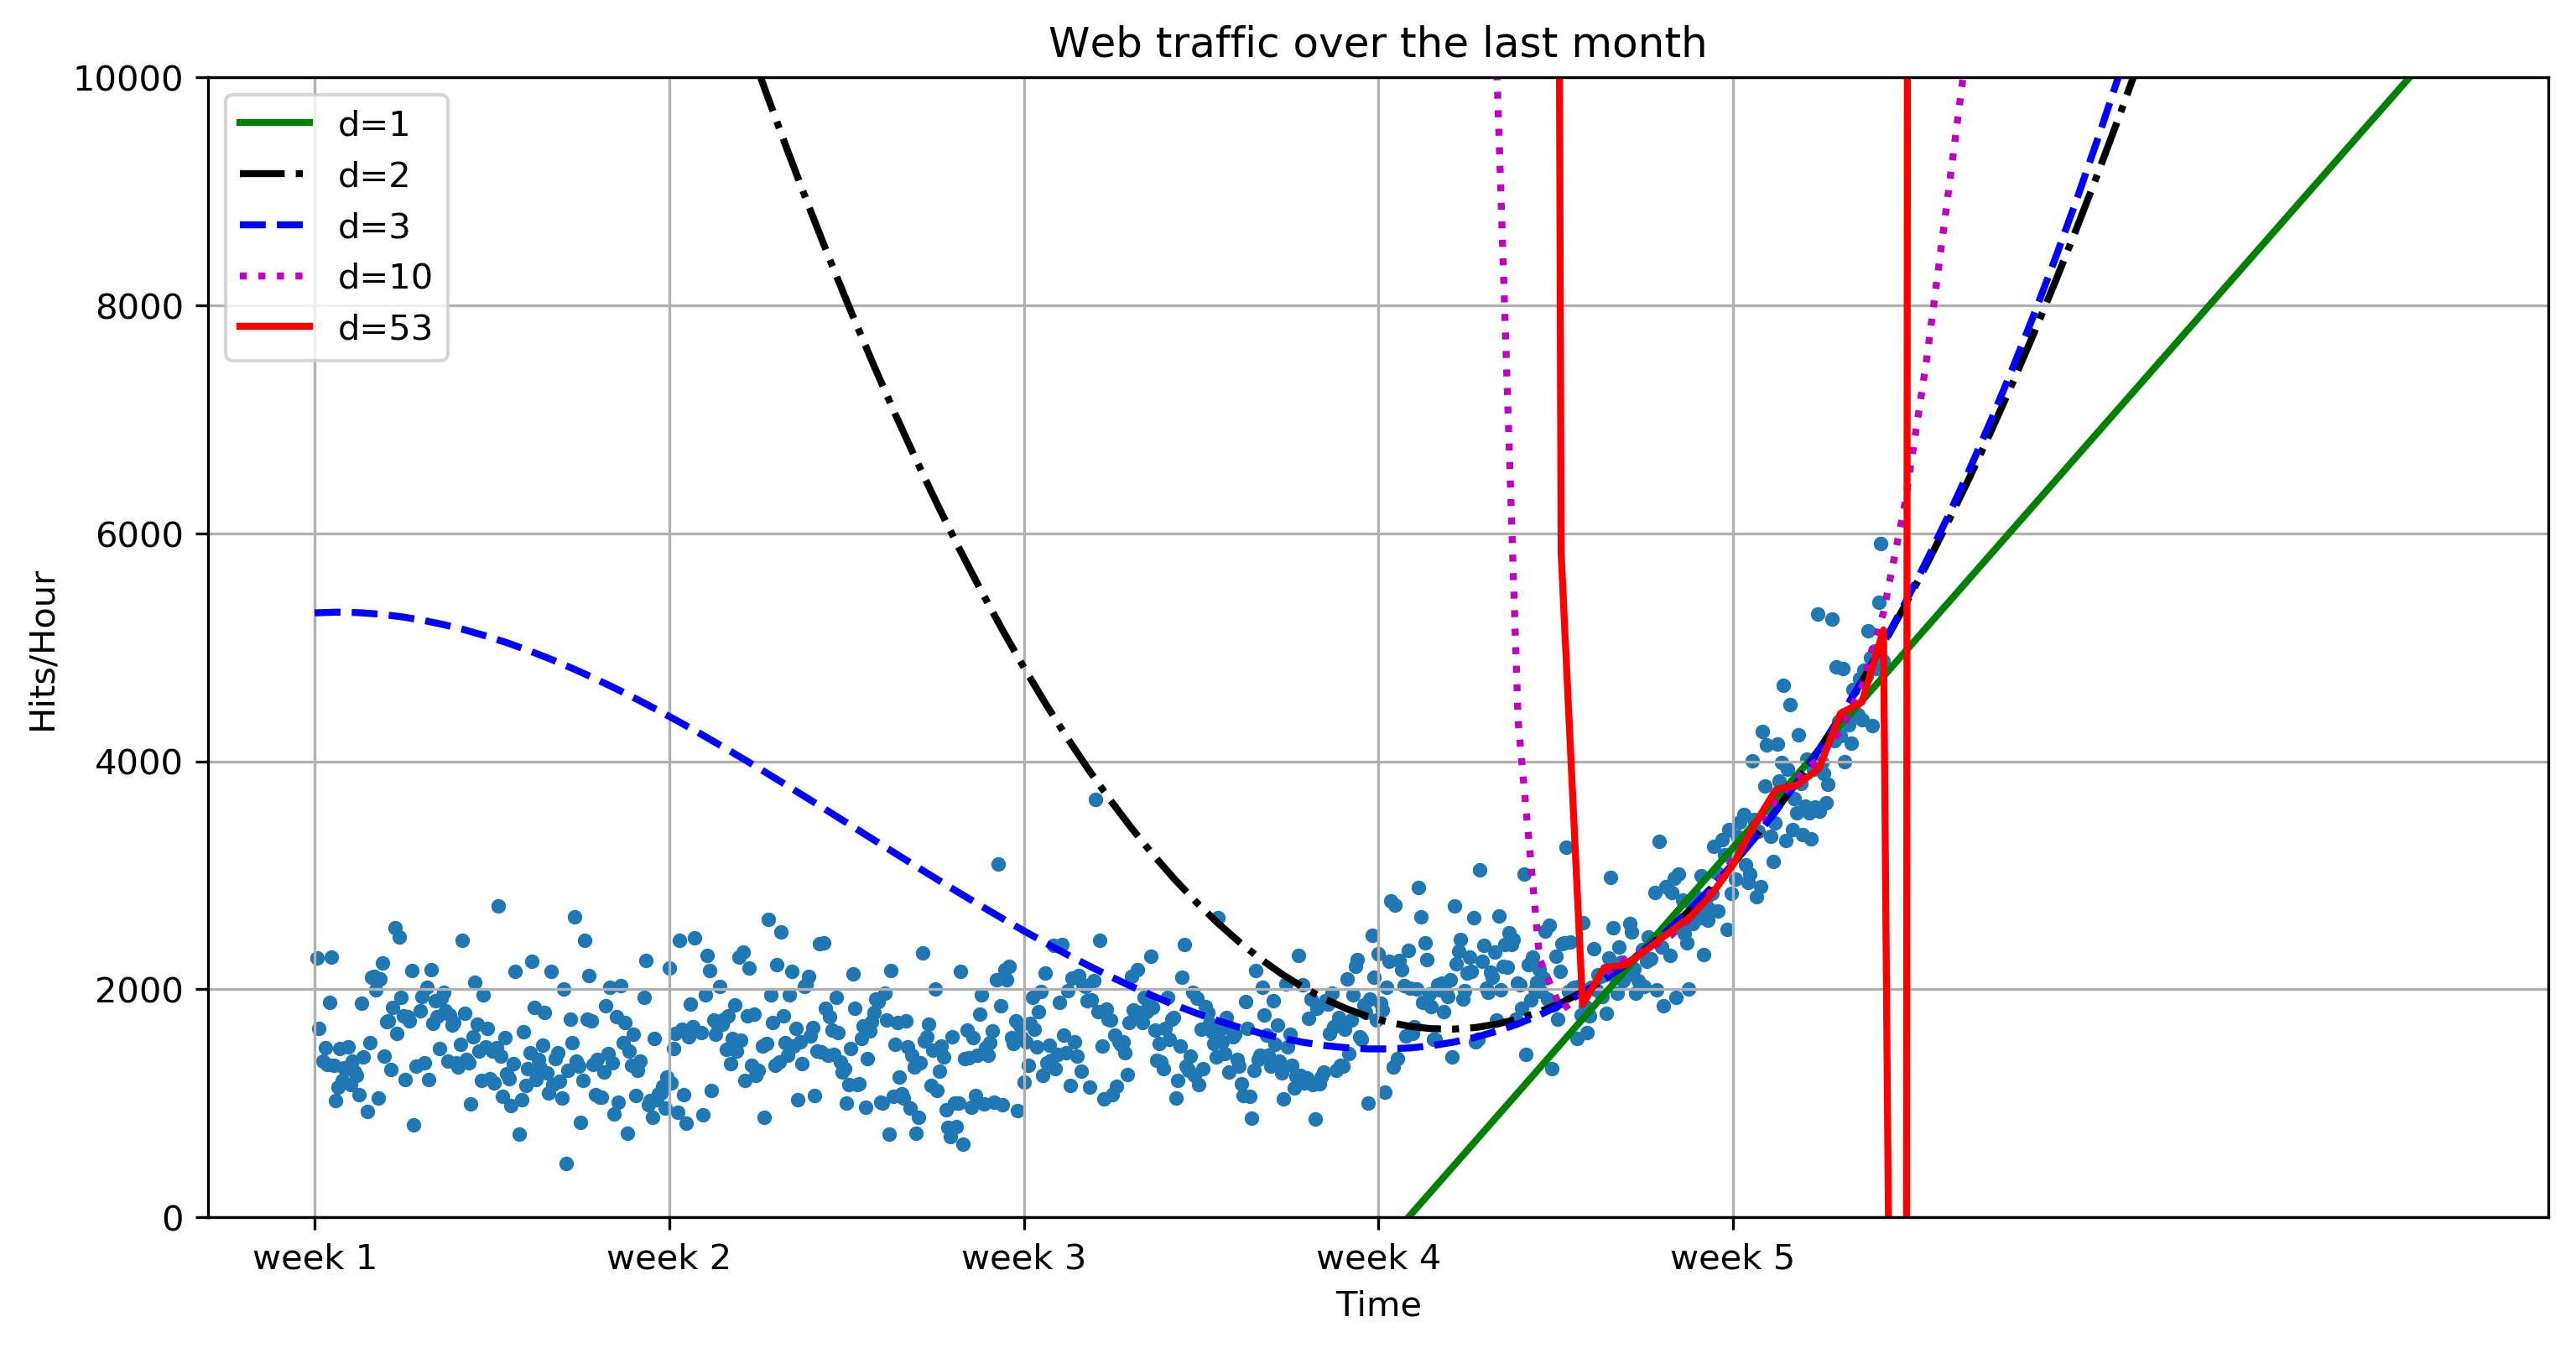

In [49]:
## apply these two our divied data
fb1 = np.poly1d(np.polyfit(xb,yb,1))
fb2 = np.poly1d(np.polyfit(xb,yb,2))
fb3 = np.poly1d(np.polyfit(xb,yb,3))
fb10 = np.poly1d(np.polyfit(xb,yb,10))
fb100 = np.poly1d(np.polyfit(xb,yb,100))

print("Errors for only the time after inflection point")
for f in [fb1,fb2,fb3,fb10,fb100]:
          print("td=%i: %f" %(f.order, error(f,xb,yb)))
plot_web_traffic(x,y,[fb1,fb2,fb3,fb10,fb100],
                mx = np.linspace(0, 6*7*24,100),
                 ymax = 10000)
          
                

In [86]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = np.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = np.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = np.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = np.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = np.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = np.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))


fbt2(x)= 
         2
0.07812 x - 83.37 x + 2.382e+04
fbt2(x)-100,000= 
         2
0.07812 x - 83.37 x - 7.618e+04
Test errors for only the time after inflection point
Error d=1: 5605486.691639
Error d=2: 4856255.979675
Error d=3: 4858686.759634
Error d=10: 4528397.206617
Error d=53: 5840055.524819


C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


In [97]:
# find out when we need to upgrade the server because we will get 100,000 hits/hour
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000,x0=700)/(7*24)
print("100,000 hits\hour expected at weeks %f" % reached_max[0])

100,000 hits\hour expected at weeks 9.857358
